# SVM - Support Vector Machine

- Was state-of-the-art before neural network-based algorithms.
- Primarily used for binary classification problems.

We constructs a hyperplane that separates classes and maximizes the margin, which is the distance between the hyperplane and the support vectors. The formula for the hyperplane is

$f(x) = b_0 + b_1 x_1 + \cdots + b_n x_n + B_n x_1 = B^TX = 0^{[1]}$,

where $B$ is a vector of weights and $X$ is the input vector.

Or $w \cdot x - b = 0$ (w.x - b = 0 ),

where $w$ is the normal vector to the hyperplane (which is equivalent to $B$), $x$ is the input vector, and $b$ is the bias term.

Once the hyperplane is set, new data points can be classified as:

f(X) > 0: (Side A) \
f(X) < 0: (Side B) \
f(X) = 0: (On the hyperplane)

### Problem 1: Noise

Soft margin = allows points to be on the wrong side of the margins, i.e., does not require a maximum margin, but allows for some misclassification. This reduces the variance and increases the bias, resulting in less overfitting.

The regularization parameter C determines the size of the margins. In ISLR, this is referred to as the 'budget'.

### Problem 2: Non-linearly separable data

Regardless of the soft margin, it is not possible to separate the classes.<br>
--> Feature expansion with polynomial features.

Example:

Transforming $(x_1, x_2)$ to $(x_1, x_2, x_1x_2, x_1^2 , x_2^2)$ hyperplane: \
$B_0 + B_1X_1 + B_2X_2 + B_3X_1X_2 + B_4X_1^2 + B_5X_2^2 = 0$

This is linear in the enlarged feature space (similar to polynomial regression), but when projected back to 2D, it becomes nonlinear.

And so we transform the data into high dimensions, find the hyperplane, and then project it back to the original hyperspace. The problem becomes linearly separable in the enlarged feature space.

Enlarging feature space is very expensive, introducing:

### Kernels

We can represent SVC with

$f(X) = B_0 + \sum_{i\in S}^{n}\hat{\alpha}_i<X,X_i>$

${i\in S}$ = index of support vector \
$<X,X_i>$ = inner product

Inner product is a generalized dot product which measures similarity of two vectors.
We use kernels to replace the inner product:

**Polynomial kernel example:**

$K(x,x_i) = (1+\sum_{j = 1}^{P} x_j x_{ij})^d$

**Radial basis kernel example:**

$K(x,x_i) = exp(-r\sum_{j = 1}^{P}(x_j x_{ij})^2)$

### What about multiple classes?

**OVA  - one vs all (good for large datasets)** \
Used to fit k 2-classifiers. For example, if we have classes 1, 2, and 3, we test one class against the other two.

**OVO - one vs one (better for small datasets, more expensive)** \
Used to fit all pairwise combinations of k classes. The class that has won the most number of times is selected.

<br>

$[1]$ Som kapitel 3, linjär algebra, fast n dimensioner<br>

Article <a href="https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/">Support Vector Machine(SVM): A Complete guide for beginners</a>

<a href="https://scikit-learn.org/stable/modules/svm.html">scikit-learn documentation</a>

## Simulating data

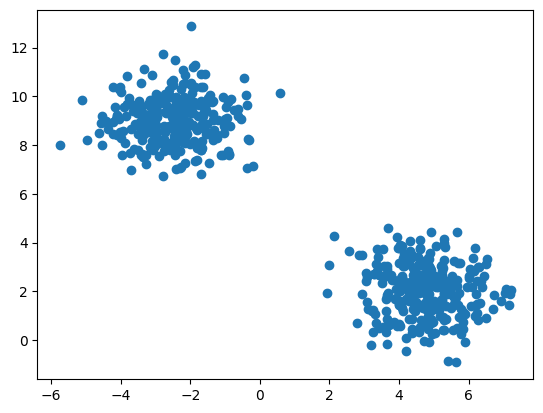

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

blobs = make_blobs([300,300], 2, random_state=42)

#blobs[0], blobs[1] # coordinates[0] and labels[1]

plt.scatter(blobs[0][:,0], blobs[0][:,1])

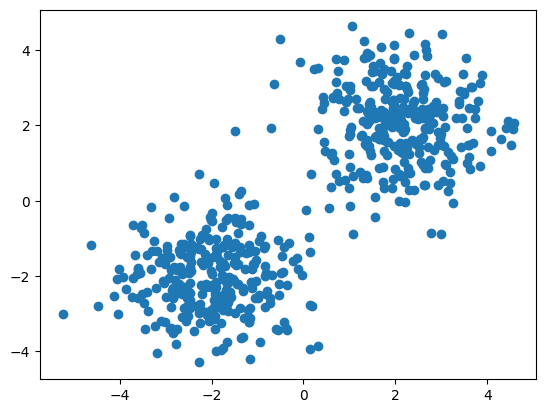

In [8]:
blobs = make_blobs([300,300], 2, random_state=42, centers= [(-2,-2), (2,2)]) # force centers
plt.scatter(blobs[0][:,0], blobs[0][:,1])

In [9]:
blobs_data, blobs_label = blobs[0], blobs[1]

In [12]:
import seaborn as sns
import pandas as pd
import numpy as np

blobs_with_label = np.c_[blobs_data, blobs_label]
blobs_with_label

array([[-1.77590752, -1.9874076 ,  0.        ],
       [ 1.9803622 ,  2.55248995,  1.        ],
       [-2.81822068,  0.09238728,  0.        ],
       ...,
       [ 4.40341559,  1.9423812 ,  1.        ],
       [ 0.65181458,  2.74326409,  1.        ],
       [ 1.07676675,  0.64831539,  1.        ]])

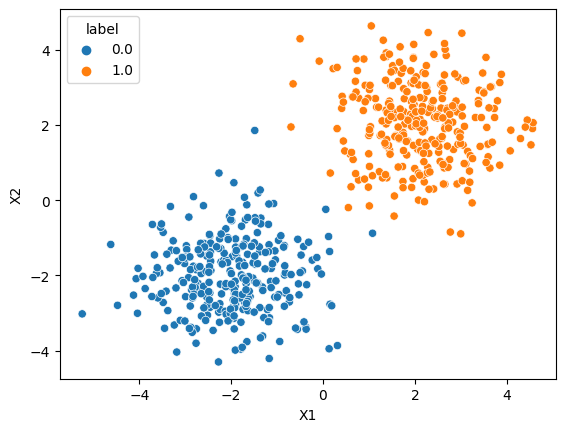

In [14]:
df = pd.DataFrame(blobs_with_label, columns=["X1","X2", "label"])

sns.scatterplot(df, x="X1", y="X2", hue="label")
plt.show()

## SVM

### Linear kernel

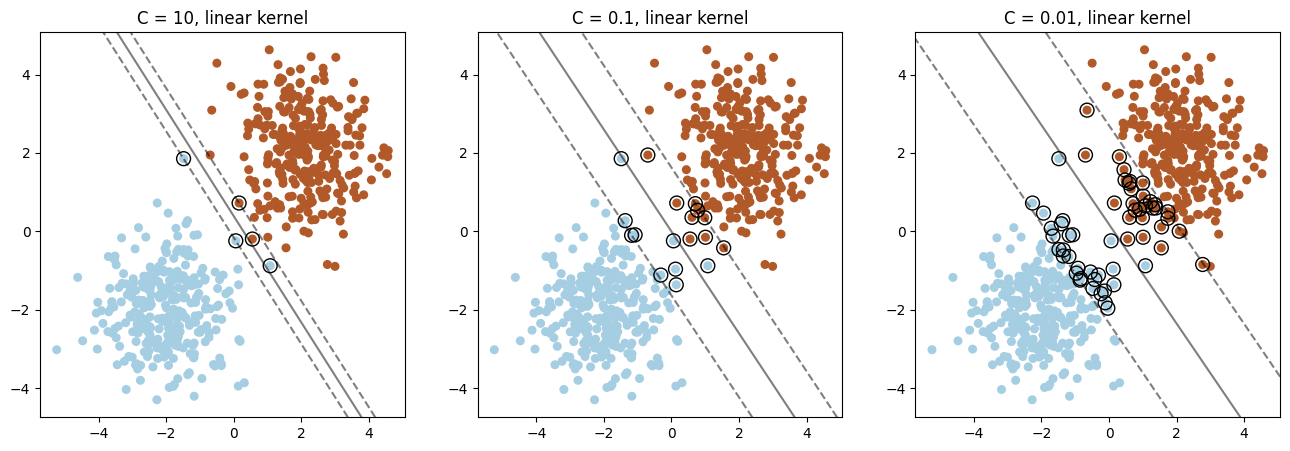

In [27]:
from utils import plot_svm_margins
from sklearn.svm import SVC #Support Vectror Classifier (Machine)

X, y = blobs_data, blobs_label

fig, axs = plt.subplots(1,3, figsize = (16,5))
for i, C in enumerate([10, 0.1, 0.01],1): # Testing different C
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='linear', C=C), X, y) # Could instead use LinearSVC (faster)
    plt.title(f"C = {C}, linear kernel")
plt.show()

### Radial basis kernel

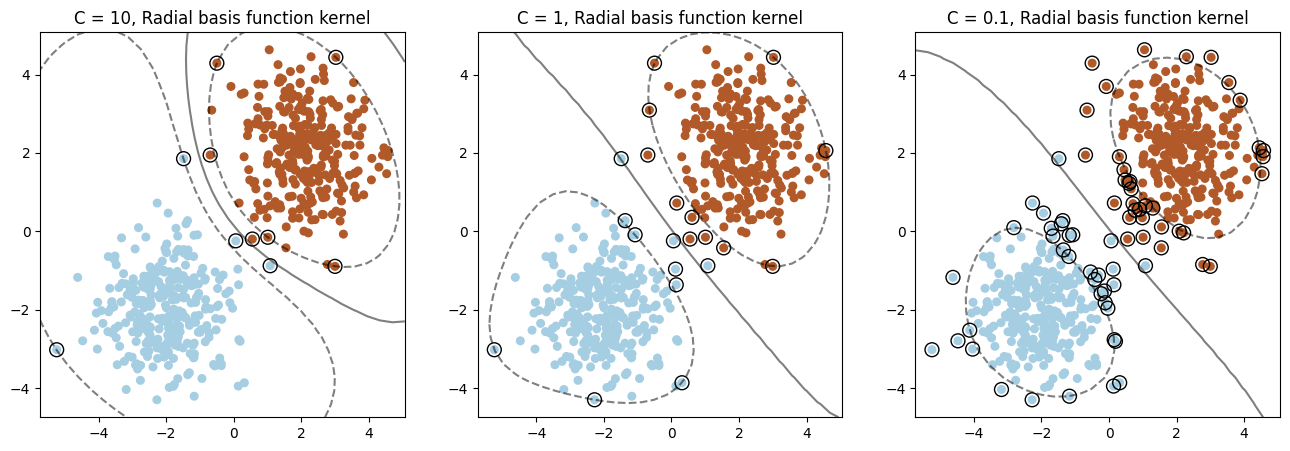

In [31]:
fig, axs = plt.subplots(1,3, figsize = (16,5))
for i, C in enumerate([10, 1, 0.1],1): # Testing different C
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='rbf', C=C), X, y)
    plt.title(f"C = {C}, Radial basis function kernel")
plt.show()

10 is a bit overfitted. 1 is pretty good.

### Polynomial kernel

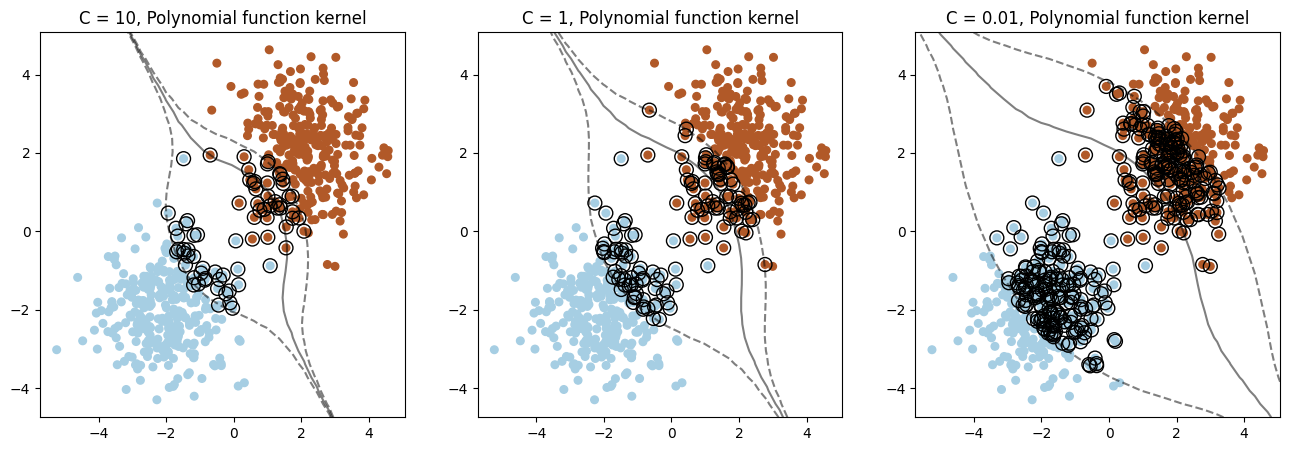

In [44]:
fig, axs = plt.subplots(1,3, figsize = (16,5))
for i, C in enumerate([10, 1, 0.01],1): # Testing different C
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='poly', C=C, degree=5), X, y) # Both C and degree hyperparameter
    plt.title(f"C = {C}, Polynomial function kernel")
plt.show()

### Sigmoid kernel

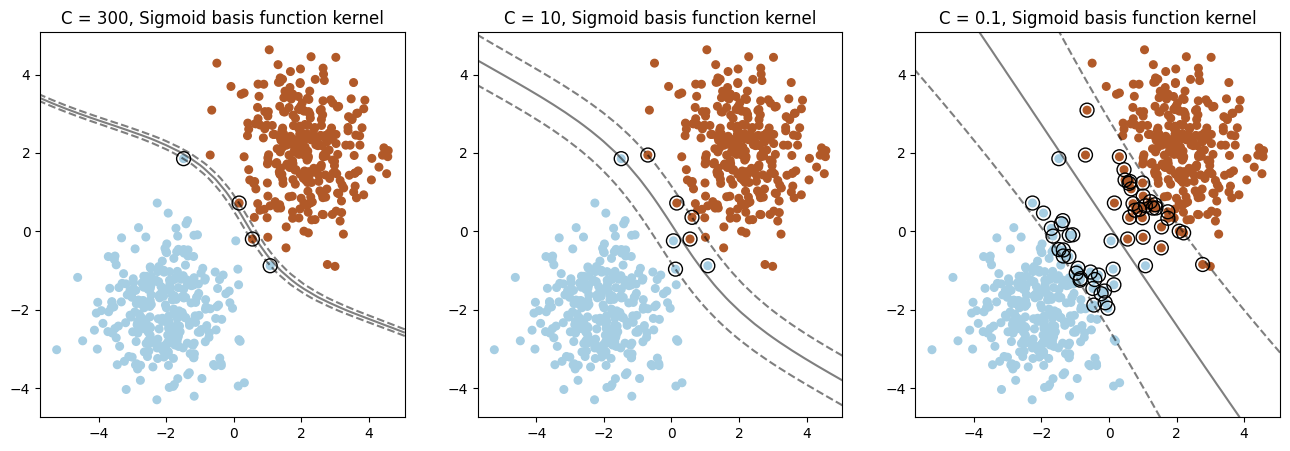

In [51]:
fig, axs = plt.subplots(1,3, figsize = (16,5))
for i, C in enumerate([300, 10, 0.1],1): # Testing different C
    plt.subplot(1,3,i)
    plot_svm_margins(SVC(kernel='sigmoid', C=C), X, y)
    plt.title(f"C = {C}, Sigmoid basis function kernel")
plt.show(sns)